In [1]:
%matplotlib inline
from ggplot import *
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt

import sklearn.linear_model as sklin
import sklearn.metrics as skmet
import sklearn.cross_validation as skcv
import sklearn.grid_search as skgs
import sklearn.preprocessing as skpr
from sklearn.linear_model import LogisticRegressionCV
from sklearn import svm

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Check for the outliers
# Look at the input data
# Look at the output data
# Look at Statistics, e.g. 
# Check whether features are directly related to the output (subset selection)
# Feature Engineer: Polynomial (with interaction terms), Sine, Tan, Log, Exp
# Try KNN
# Try SVM
# Try Logistic Regression
# Try Ensemble
# Stratified sampling
# Log 0,4,5,6,7,12,13, 14

In [2]:
train = np.loadtxt(open("/Users/Anuar_The_Great/Desktop/Project/2/train.csv", "rb"), 
                    delimiter=",", skiprows=1)
test = np.loadtxt(open("/Users/Anuar_The_Great/Desktop/Project/2/test.csv", "rb"), 
                    delimiter=",", skiprows=1)

In [3]:
def get_features(data):
    return np.hstack((data, np.log(data)))    # You can also do log and interaction terms!
 
X = train[:, 2:17]
Y = train[:, 1]
test = test[:, 1:16]

X = skpr.scale(X)
test = skpr.scale(test)

#poly = skpr.PolynomialFeatures(degree=3, interaction_only=False)
#X = poly.fit_transform(X) 
#test = poly.fit_transform(test)

print('X.shape', X.shape)
print('Y.shape', Y.shape)
print('test.shape', test.shape)

X.shape (1000, 15)
Y.shape (1000,)
test.shape (3000, 15)


In [5]:
Css = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5]
lr = LogisticRegressionCV(Cs=Css, cv=5, multi_class='ovr', refit=True, penalty='l1', solver='liblinear')
lr.fit(X, Y)

LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0, 10000.0, 100000.0],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)

In [8]:
print(lr.score(X, Y))
print(lr.C_)

0.87
[ 100.  100.  100.]


In [20]:
lr1 = LogisticRegressionCV(cv=5, refit=True)
param_grid = {'Cs': [1, 5, 10, 50],
             'penalty': ['l2'],
             'multi_class': ['ovr', 'multinomial'],
             'solver': ['newton-cg', 'lbfgs']}
grid_search = skgs.GridSearchCV(lr1, param_grid, cv=5)
grid_search.fit(X, Y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='newton-cg', tol=0.0001,
           verbose=0)
0.863


In [14]:
def my_kernel(X, Y):
    return np.dot(X, Y.T) #np.exp(-np.power(np.linalg.norm(X - Y), 2)) 

In [18]:
param_grid1 = {'C': np.linspace(0.001, 10, 20)}  
param_grid2 = {'C': np.linspace(0.2, 10, 30),
              'gamma': np.linspace(0.01, 1, 30)}  
param_grid3 = {'C': np.linspace(0.01, 100, 10),
              'gamma': np.linspace(0.001, 1, 10),
              'degree': [2, 3, 4]}  

#svc = svm.SVC(kernel='linear')
#rbf_svc = svm.SVC(kernel='rbf', cache_size=300)
poly_svc = svm.SVC(kernel='poly')
#lin_svc = svm.LinearSVC()

grid_search = skgs.GridSearchCV(poly_svc, param_grid1, cv=10)
grid_search.fit(X, Y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

SVC(C=1.5797894736842104, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.886


In [13]:
#submission = lr.predict(test)
submission = grid_search.predict(test)
np.savetxt('RBF2.csv', submission)

(array([   7.,   20.,   56.,   84.,  101.,   89.,  115.,  174.,  139.,
          91.,   63.,   35.,   16.,    8.,    2.]),
 array([-2.58218931, -2.20839265, -1.83459599, -1.46079932, -1.08700266,
        -0.713206  , -0.33940934,  0.03438733,  0.40818399,  0.78198065,
         1.15577731,  1.52957398,  1.90337064,  2.2771673 ,  2.65096396,
         3.02476063]),
 <a list of 15 Patch objects>)

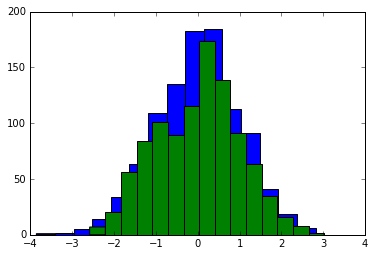

In [21]:
plt.hist(X[:,0], bins=15)
plt.hist(X[:,1], bins=15)
#plt.hist(X[:,2], bins=15)
#plt.hist(X[:,3], bins=15)


(array([   2.,    3.,    1.,    7.,   17.,   27.,   63.,  116.,  197.,
         216.,  196.,  108.,   37.,    7.,    3.]),
 array([ 2.34943607,  2.79322853,  3.23702099,  3.68081345,  4.12460591,
         4.56839837,  5.01219083,  5.45598329,  5.89977575,  6.34356821,
         6.78736068,  7.23115314,  7.6749456 ,  8.11873806,  8.56253052,
         9.00632298]),
 <a list of 15 Patch objects>)

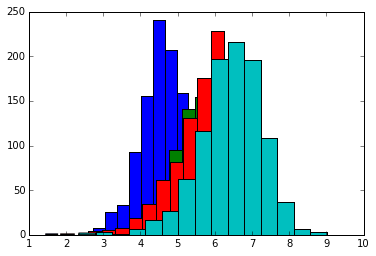

In [36]:
plt.hist(X[:,4], bins=15)
plt.hist(X[:,5], bins=15)
plt.hist(X[:,6], bins=15)
plt.hist(X[:,7], bins=15)


(array([   1.,    2.,    8.,   29.,   71.,   95.,  134.,  154.,  175.,
         138.,   93.,   61.,   29.,    6.,    4.]),
 array([ -7.45798908,  -3.08283938,   1.29231031,   5.66746001,
         10.0426097 ,  14.41775939,  18.79290909,  23.16805878,
         27.54320847,  31.91835817,  36.29350786,  40.66865755,
         45.04380725,  49.41895694,  53.79410663,  58.16925633]),
 <a list of 15 Patch objects>)

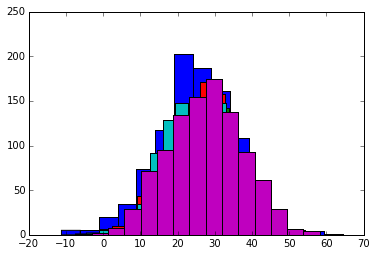

In [45]:
plt.hist(X[:,8], bins=15)
plt.hist(X[:,9], bins=15)
plt.hist(X[:,10], bins=15)
plt.hist(X[:,11], bins=15)
plt.hist(X[:,12], bins=15)


(array([   1.,    1.,    9.,   31.,   73.,  110.,  158.,  177.,  155.,
         115.,   81.,   55.,   23.,    8.,    3.]),
 array([  7.89234527,  10.0654168 ,  12.23848832,  14.41155985,
         16.58463138,  18.75770291,  20.93077443,  23.10384596,
         25.27691749,  27.44998902,  29.62306054,  31.79613207,
         33.9692036 ,  36.14227513,  38.31534665,  40.48841818]),
 <a list of 15 Patch objects>)

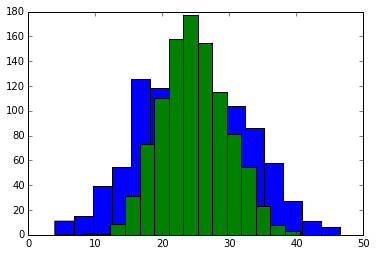

In [43]:
#plt.hist(X[:,12], bins=15)
plt.hist(X[:,13], bins=15)
plt.hist(X[:,14], bins=15)
